In [1]:
# Packages
import sys; sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from src.collocation import collocation1d
from src.plot import plot_collocation1d, plot_simulation1d
from src.generator import generator1d
from src.polynomial import polynomial1d

# Case 1

- One variable
- Zero boundary condition
- Linear equation
- Polynomial solution

Equation: 

$$
\begin{align}
\begin{cases}
&u''+u'+u = 10x^3+14x^2-34x-26 \\
&u(0) = 0\\
&u(1) = 0
\end{cases}
\end{align}
$$

Analytical solution: 

$$u = 10x^3 - 16x^2 + 6x$$

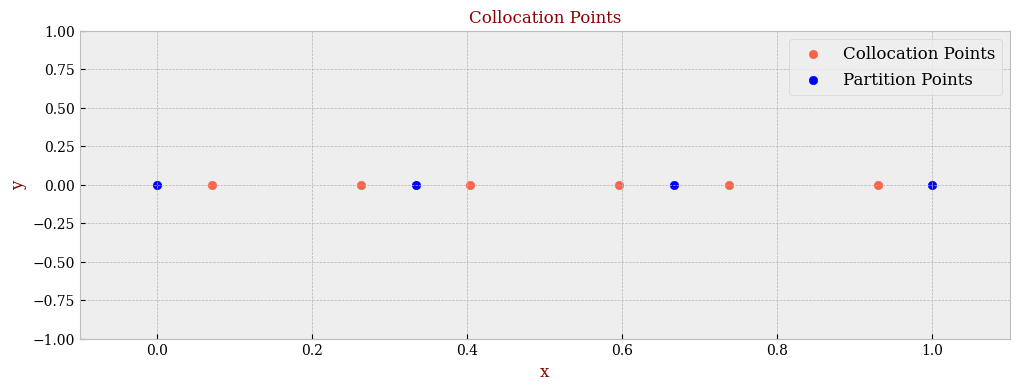

In [2]:
# Parameter
n = 3
r = 3
f = lambda x: 10 * x ** 3 + 14 * x ** 2 + 34 * x - 26
u = lambda x: 10 * x ** 3 - 16 * x ** 2 + 6 * x
b1 = 0
b2 = 0

# Partition and Collocation
partition, collocation = collocation1d(n, r)

# Show Partition and Collocation Points
plot_collocation1d(partition, collocation, n, r)

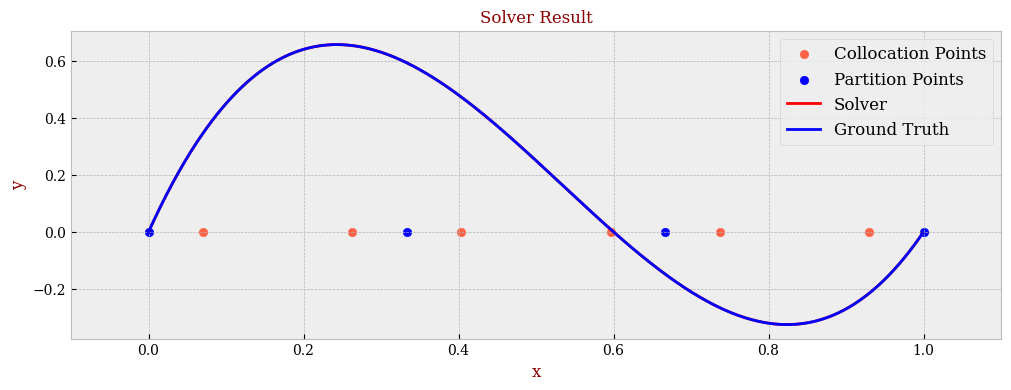

In [3]:
# Generate Algebra Equation
weight, value = generator1d(partition, collocation, n, r, f, b1, b2)

# Solve the Algebra Euqation
solution = np.linalg.solve(weight, value)

# Get Simulation Value in [0, 1]
position, simulation = polynomial1d(partition, solution, n, r, num=256)

# Get Ground Truth Value in [0, 1]
ground_truth = u(position)

# Plot Result
plot_simulation1d(position, simulation, ground_truth, partition, collocation, n, r)
plt.show()

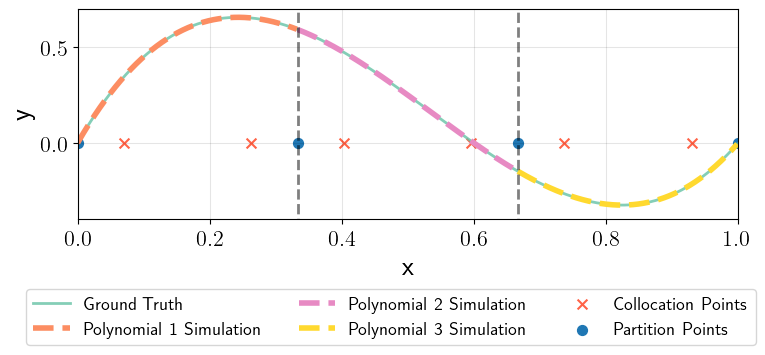

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams.update({'text.usetex': True})

title_font = {'family': 'Arial Black', 'fontsize': 18, 'fontweight': 'bold'}
label_font = {'family': 'Arial Black', 'fontsize': 20}
legend_font = {'family': 'Palatino Linotype', 'size': 13}
text_font = {'family': 'Palatino Linotype', 'fontsize': 16}

fig, axs = plt.subplots(1, figsize=(8, 3))

# Ground Truth
axs.plot(position, ground_truth, label='Ground Truth', color=cm.Set2(0), lw=2, alpha=0.8)

# Simulation Line
axs.plot(position[:int(len(position)/3)], simulation[:int(len(position)/3)], 
    label='Polynomial 1 Simulation', color=cm.Set2(1), ls='--', lw=4, alpha=1)
axs.plot(position[int(len(position)/3):2*int(len(position)/3)], simulation[int(len(position)/3):2 * int(len(position)/3)], 
    label='Polynomial 2 Simulation', color=cm.Set2(3), ls='--', lw=4, alpha=1)
axs.plot(position[2*int(len(position)/3):3*int(len(position)/3)], simulation[2*int(len(position)/3):3*int(len(position)/3)], 
    label='Polynomial 3 Simulation', color=cm.Set2(5), ls='--', lw=4, alpha=1)

# Dash lines
axs.plot([partition[1], partition[1]], [-0.6, 0.7], color='black', ls='--', lw=2, alpha=0.5)
axs.plot([partition[2], partition[2]], [-0.6, 0.7], color='black', ls='--', lw=2, alpha=0.5)

axs.scatter(collocation, np.zeros((n) * (r - 1)), label='Collocation Points', 
            marker='x', s=50, color='tomato')
axs.scatter(partition, np.zeros(n + 1), label='Partition Points', 
            marker='o', s=50, color=cm.tab10(0))

axs.set_xlim([0, 1])
axs.set_ylim([-0.4, 0.7])
axs.set_xlabel('x', fontdict=label_font)
axs.set_ylabel('y', fontdict=label_font)
axs.grid(axis='both', color='black', alpha=0.1)
axs.tick_params(axis='both', which='major', labelsize=16)

labels = axs.get_xticklabels() + axs.get_yticklabels()
[label.set_fontname('serif') for label in labels]

handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=int(len(labels)/2), bbox_to_anchor=(0.53, -0.2), prop=legend_font)

plt.tight_layout()
plt.show()

# Case 2

- One variable
- Zero boundary condition
- Nonlinear equation
- Nonlinear solution

Equation:


$$
\begin{align}
\begin{cases}
&u''+u'+u = (1-9\pi^2)\mathrm{sin}(3\pi x) + 3\pi \mathrm{cos}(3\pi x)\\
&u(0) = 0\\
&u(1) = 0
\end{cases}
\end{align}
$$

Analytical solution: 

$$u = \mathrm{sin}(3\pi x)$$

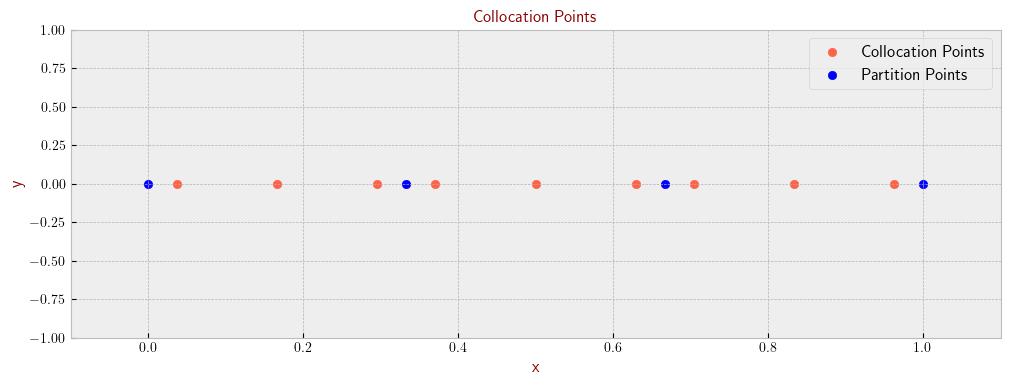

In [5]:
# Parameter
n = 3
r = 4
f = lambda x: (1 - 9 * np.pi ** 2) * np.sin(3 * np.pi * x) + 3 * np.pi * np.cos(3 * np.pi * x)
u = lambda x: np.sin(3 * np.pi * x)
b1 = 0
b2 = 0

# Partition and Collocation
partition, collocation = collocation1d(n, r)

# Show Partition and Collocation Points
plot_collocation1d(partition, collocation, n, r)
plt.show()

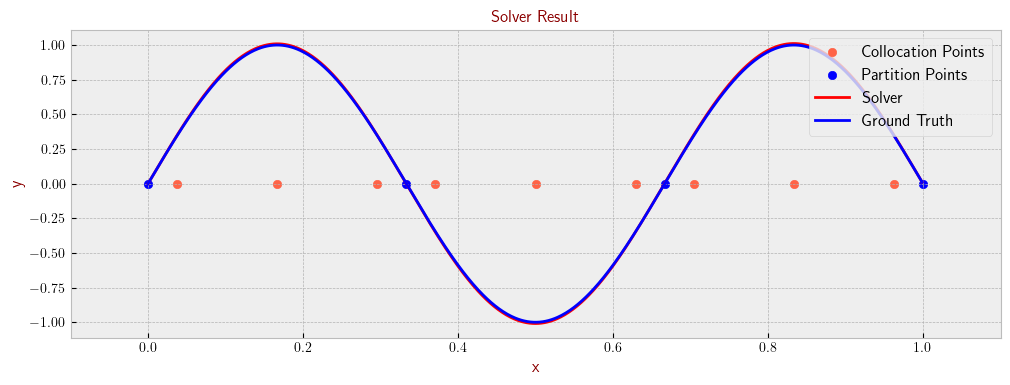

In [6]:
# Generate Algebra Equation
weight, value = generator1d(partition, collocation, n, r, f, b1, b2)

# Solve the Algebra Euqation
solution = np.linalg.solve(weight, value)

# Get Simulation Value in [0, 1]
position, simulation = polynomial1d(partition, solution, n, r, num=256)

# Get Ground Truth Value in [0, 1]
ground_truth = u(position)

# Plot Result
plot_simulation1d(position, simulation, ground_truth, partition, collocation, n, r)
plt.show()